<a href="https://colab.research.google.com/github/PreePrem/HandWrittenDigitClassifier/blob/main/HandwrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

load the MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


normalize the value

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

BUild the ANN model

In [ ]:
model = models.Sequential([layers.Flatten(input_shape=(28,28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10)])

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train the model

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2575 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1131 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0778 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0583 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0443 - accuracy: 0.9862


evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy: ", test_acc)

313/313 - 1s - loss: 0.0751 - accuracy: 0.9764 - 576ms/epoch - 2ms/step

Test Accuracy:  0.9764000177383423


make predictions

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


show the predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({100 * np.max(predictions_array):2.0f}%)", color=color)


# Plot some test images with their predictions

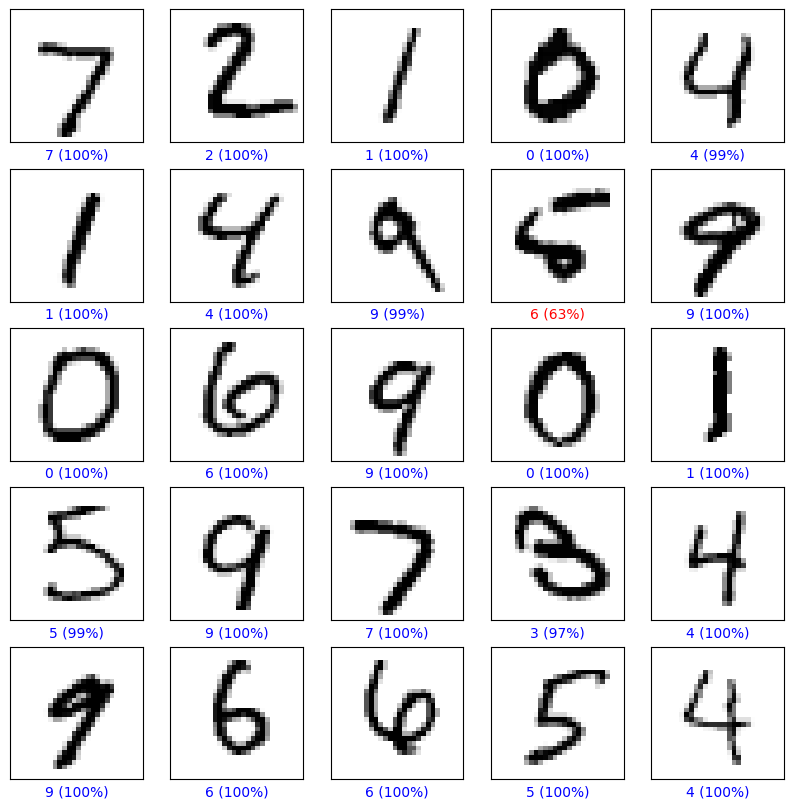

In [ ]:
num_rows, num_cols = 5, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, y_test, x_test)
plt.show()